In [1]:
#
#自動車燃費予測
#
# My Drive/
#   └ SIGNATE1_nenpi
#        ├ Fuel_economy.ipynb
#        └ my_modules/
#            └ modules.py
#

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

In [5]:
import sys
sys.path.append('/content/drive/My Drive/SIGNATE1_nenpi/my_modules')

In [6]:
import  modules


In [7]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import lightgbm as lgb

In [9]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/SIGNATE1_nenpi/train.tsv","\t")
test = pd.read_csv("/content/drive/My Drive/SIGNATE1_nenpi/test.tsv","\t")
sample_submit= pd.read_csv("/content/drive/My Drive/SIGNATE1_nenpi/sample_submit.csv",header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
#トレインテスト処理のための結合
train_test = pd.concat([train,test],axis = 0)

In [11]:
# ・nan確認
train.isnull().sum()


id              0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
test.isnull().sum()

id              0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
train_test.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [14]:
#car name 確認
print(len(train_test["car name"].unique()))

305


In [15]:
#car name は種類が多い。メーカーが含まれている。
#メーカーごとに分類する。
import  modules
train_test["Manufacturer"] = train_test["car name"].apply(modules.Manufacturer)

In [16]:
# le = LabelBinarizer
# train_test["Manufacturer"] = le.fit_transform(train_test["Manufacturer"].values)



le = LabelEncoder()
encoded = le.fit_transform(train_test['Manufacturer'].values)
decoded = le.inverse_transform(encoded)
train_test['Manufacturer'] = encoded
train_test = train_test.drop(columns=['car name'])


In [17]:
train_test

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Manufacturer
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,11
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,36
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,30
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,11
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,30
...,...,...,...,...,...,...,...,...,...,...
194,391,NaN,4,114.0,91.00,2582.0,14.0,73,2,1
195,392,NaN,4,156.0,105.0,2800.0,14.4,80,1,11
196,393,NaN,4,111.0,80.00,2155.0,14.8,77,1,3
197,394,NaN,8,400.0,180.0,4220.0,11.1,77,1,26


In [161]:
#"Manufacturer" ワンホット
#"Manufacturer","car name"のdrop
# dummy_df = pd.get_dummies(train_test["Manufacturer"])
# train_test = pd.concat([train_test,dummy_df],axis = 1)
# train_test = train_test.drop(columns=['Manufacturer'])
# train_test = train_test.drop(columns=['car name'])

In [18]:
#平均で埋める平均は84
train_test["horsepower"] = train_test["horsepower"].replace("?","84")
train_test["horsepower"] = train_test["horsepower"].astype(float)

In [63]:
################################
#
#　　　　　可視化
#　結合したtrainとsplitを分割
#
################################


In [67]:
train


,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,amc,...,renault,saab,subaru,toyota,toyouta,triumph,vokswagen,volkswagen,volvo,vw
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,0,...,0,0,0,0,0,0,0,0,0,1
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,0,...,0,0,0,1,0,0,0,0,0,0
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,384,40.8,4,85.0,65.0,2110.0,19.2,80,3,0,...,0,0,0,0,0,0,0,0,0,0
195,385,20.2,8,302.0,139.0,3570.0,12.8,78,1,0,...,0,0,0,0,0,0,0,0,0,0
196,387,16.0,8,304.0,150.0,3433.0,12.0,70,1,1,...,0,0,0,0,0,0,0,0,0,0
197,395,43.4,4,90.0,48.0,2335.0,23.7,80,2,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             199 non-null    int64  
 1   mpg            199 non-null    float64
 2   cylinders      199 non-null    int64  
 3   displacement   199 non-null    float64
 4   horsepower     199 non-null    float64
 5   weight         199 non-null    float64
 6   acceleration   199 non-null    float64
 7   model year     199 non-null    int64  
 8   origin         199 non-null    int64  
 9   amc            199 non-null    uint8  
 10  audi           199 non-null    uint8  
 11  bmw            199 non-null    uint8  
 12  buick          199 non-null    uint8  
 13  cadillac       199 non-null    uint8  
 14  capri          199 non-null    uint8  
 15  chevroelt      199 non-null    uint8  
 16  chevrolet      199 non-null    uint8  
 17  chevy          199 non-null    uint8  
 18  chrysler  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


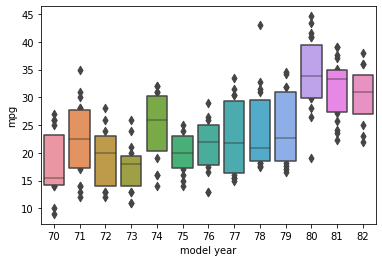

In [78]:
#mpg と　model year　に相関あり。
#model year 80、81，82を1としてそれ以外を0にしてみる
sns.boxenplot("model year","mpg",data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


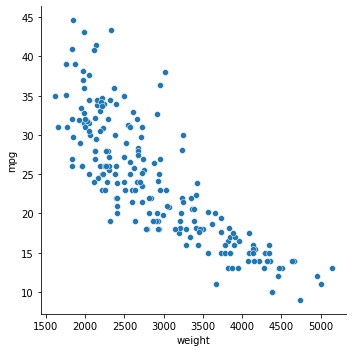

In [85]:
#mpg と　	displacement	horsepower	weight　に相関あり。
#	displacement	horsepower	weight 対数とってみる。
sns.relplot(train["displacement"],train["mpg"])

In [46]:
################################
#
#　　可視化からの特徴量作成
#　
################################

In [19]:
train_test["model year_a"] = train_test["model year"]

In [20]:
#クラス分け。
for i in range(70,80):
  train_test["model year_a"][train_test["model year_a"] ==  i] = 0
for i in range(80,83):
  train_test["model year_a"][train_test["model year_a"] ==  i] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
train_test["model year_a"].unique()

array([1, 0])

In [22]:
#mpg と　	displacement	horsepower	weight　対数化。
train_test["displacement_log"] = np.log(train_test["displacement"])
train_test["horsepower_log"] = np.log(train_test["horsepower"])
train_test["weight_log"] = np.log(train_test["weight"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


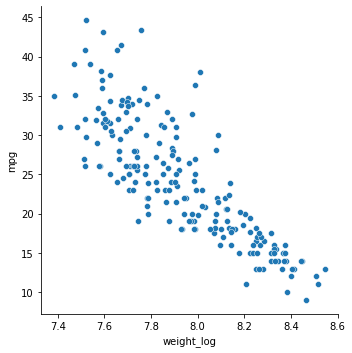

In [23]:
sns.relplot(train_test["weight_log"],train_test["mpg"])

In [24]:
train_X = train_test[~train_test["mpg"].isnull()].drop("mpg",axis = 1)
train_Y = train["mpg"]
test_x = train_test[train_test["mpg"].isnull()].drop("mpg",axis = 1)

In [169]:
train_X.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Manufacturer,model year_a,displacement_log,horsepower_log,weight_log
0,0,4,135.0,84.0,2525.0,16.0,82,1,11,1,4.905275,4.430817,7.833996
1,3,4,89.0,71.0,1925.0,14.0,79,2,36,0,4.488636,4.262680,7.562681
2,9,6,156.0,108.0,2930.0,15.5,76,3,30,0,5.049856,4.682131,7.982758
3,11,4,90.0,75.0,2125.0,14.5,74,1,11,0,4.499810,4.317488,7.661527
4,13,4,89.0,62.0,2050.0,17.3,81,3,30,1,4.488636,4.127134,7.625595


In [106]:
X_train,X_test,y_train,y_test = train_test_split(train_X,train_Y,random_state = 20)
lr = LR()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
test_test = lr.predict(test_x)
mse_train = MSE(y_pred_train,y_train)
mse_test = MSE(y_pred_test,y_test)

In [107]:
print(mse_train)
print(mse_test)

5.7975630480265945
4.64942892609431


In [108]:
sample_submit[1] = test_test

In [109]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

PATH_MYDRIVE="/content/drive/My Drive/SIGNATE1_nenpi"
sample_submit.to_csv(f'{PATH_MYDRIVE}/submit3.csv', index=False)
!ls -lrt '{PATH_MYDRIVE}'



total 163
-rw------- 1 root root 11486 Mar 20 07:10  train.tsv
-rw------- 1 root root 10577 Mar 20 07:10  test.tsv
-rw------- 1 root root  1933 Mar 20 07:10  sample_submit.csv
-rw------- 1 root root  4437 Mar 20 11:09  wakoushi.csv
-rw------- 1 root root  7886 Mar 20 14:05  train2.tsv
-rw------- 1 root root  7105 Mar 20 14:08  test2.tsv
-rw------- 1 root root  4427 Mar 20 14:20  submit2.csv
-rw------- 1 root root 15698 Jun 11 07:24 'Untitled0.ipynb のコピー のコピー'
drwx------ 3 root root  4096 Jun 11 08:36  my_modules
-rw------- 1 root root 92835 Jun 11 11:17  Fuel_economy.ipynb
-rw------- 1 root root  4443 Jun 11 11:17  submit3.csv


In [114]:
##################################################
#
#  Lightgbm
#
##################################################

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y,random_state = 20)

In [26]:
# カテゴリー変数
categorical_features = ["cylinders","origin","Manufacturer","model year_a"]


# 5-fold CVモデルの学習
# 5つのモデルを保存するリストの初期化
models = []

# 学習データの数だけの数列（0行から最終行まで連番）
row_no_list = list(range(len(y_train)))

# KFold（これを使って5分割する）
K_fold = KFold(n_splits=5, shuffle=True,  random_state=42)

# KFoldクラスで分割した回数だけ実行（ここでは5回）
for train_cv_no, eval_cv_no in K_fold.split(row_no_list, y_train):
    # ilocで取り出す行を指定
    X_train_cv = X_train.iloc[train_cv_no, :]
    y_train_cv = pd.Series(y_train).iloc[train_cv_no]
    X_eval_cv = X_train.iloc[eval_cv_no, :]
    y_eval_cv = pd.Series(y_train).iloc[eval_cv_no]
    
    # 学習用
    lgb_train = lgb.Dataset(X_train_cv, y_train_cv,
                            categorical_feature=categorical_features,
                            free_raw_data=False)
    # 検証用
    lgb_eval = lgb.Dataset(X_eval_cv, y_eval_cv, reference=lgb_train,
                           categorical_feature=categorical_features,
                           free_raw_data=False)

    

    params = {'objective': 'regression',
        'metric': 'rmse',
        'early_stopping_rounds':10,
        'n_estimators':10000}
    # 学習
    evaluation_results = {}                                     # 学習の経過を保存する箱
    model = lgb.train(params,                                   # 上記で設定したパラメータ
                      lgb_train,                                # 使用するデータセット
                      num_boost_round=1000,                     # 学習の回数
                      valid_names=['train', 'valid'],           # 学習経過で表示する名称
                      valid_sets=[lgb_train, lgb_eval],         # モデル検証のデータセット
                      evals_result=evaluation_results,          # 学習の経過を保存
                      categorical_feature=categorical_features, # カテゴリー変数を設定
                      early_stopping_rounds=20,                 # アーリーストッピング# 学習
                      verbose_eval=-1)                          # 学習の経過の非表示
    
    # テストデータで予測する
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)


    
    # 学習が終わったモデルをリストに入れておく
    models.append(model) 

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[48]	train's rmse: 2.17928	valid's rmse: 4.38196
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[39]	train's rmse: 2.34232	valid's rmse: 3.45026
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[45]	train's rmse: 2.35946	valid's rmse: 3.32043
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[23]	train's rmse: 2.7817	valid's rmse: 2.71111
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[43]	train's rmse: 2.43929	valid's rmse: 2.70942


In [27]:
pred1 = model.predict(test_x)
print(pred1)

[28.5703834  18.33815873 32.0631279  18.82879417 27.27816032 23.85938423
 15.09591656 18.55382689 22.68194878 19.59759676 14.19684764 26.7415756
 14.19684764 34.84606721 34.51261455 15.54388748 23.64536332 22.5003905
 14.42327681 30.4713434  24.50362209 36.64299697 16.21872519 14.19684764
 17.69577808 14.19684764 14.49254059 20.50186423 31.01416911 30.2410554
 33.73908134 20.08107753 36.9649575  14.19684764 20.08107753 31.60599809
 34.41110231 18.57141181 25.67052809 35.81842405 14.11513633 29.6704083
 21.11338122 30.38274279 22.98920552 36.4842514  35.18179858 20.11369774
 23.36079996 24.8316027  25.03601418 24.57069358 33.58519261 19.49129044
 30.04433994 15.05927299 14.60817499 32.08603865 14.16020407 15.75145785
 14.60817499 25.27998397 31.43543153 16.18208162 25.45955688 14.33468018
 36.32882898 30.45048889 19.56192927 14.2488826  20.97109053 30.79739907
 34.87861613 14.2488826  33.85030361 26.96178185 20.46378452 14.2488826
 14.2488826  19.13178616 31.18775462 34.94938126 22.6070

In [173]:
sample_submit[1] = pred1
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

PATH_MYDRIVE="/content/drive/My Drive/SIGNATE1_nenpi"
sample_submit.to_csv(f'{PATH_MYDRIVE}/submit5.csv', index=False)
!ls -lrt '{PATH_MYDRIVE}'


total 199
-rw------- 1 root root  11486 Mar 20 07:10  train.tsv
-rw------- 1 root root  10577 Mar 20 07:10  test.tsv
-rw------- 1 root root   1933 Mar 20 07:10  sample_submit.csv
-rw------- 1 root root   4437 Mar 20 11:09  wakoushi.csv
-rw------- 1 root root   7886 Mar 20 14:05  train2.tsv
-rw------- 1 root root   7105 Mar 20 14:08  test2.tsv
-rw------- 1 root root   4427 Mar 20 14:20  submit2.csv
-rw------- 1 root root  15698 Jun 11 07:24 'Untitled0.ipynb のコピー のコピー'
drwx------ 3 root root   4096 Jun 11 08:36  my_modules
-rw------- 1 root root   4443 Jun 11 11:17  submit3.csv
-rw------- 1 root root   4435 Jun 11 12:36  submit4.csv
-rw------- 1 root root 120325 Jun 11 13:02  Fuel_economy.ipynb
-rw------- 1 root root   4435 Jun 11 13:02  submit5.csv
